In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## get data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-10-30 09:08:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  79.5MB/s    in 1.3s    

2022-10-30 09:08:48 (79.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import zipfile
## Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
## Inspect the datsa
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in '{dirpath}'")
  

There are 2 directories and 0 in 'pizza_steak'
There are 2 directories and 0 in 'pizza_steak/train'
There are 0 directories and 750 in 'pizza_steak/train/pizza'
There are 0 directories and 750 in 'pizza_steak/train/steak'
There are 2 directories and 0 in 'pizza_steak/test'
There are 0 directories and 250 in 'pizza_steak/test/pizza'
There are 0 directories and 250 in 'pizza_steak/test/steak'


In [ ]:
# Get the classnames programmaticalyy
import pathlib

data_dir = pathlib.Path("pizza_steak/train")
# Created a list of class_names from the subdirector
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) 
print(class_names)

['pizza' 'steak']


In [ ]:
## Let's visualize our images
import matplotlib.image as mping
import random

def view_random_image(target_dir, target_class):
  ## Setup the target directory
  target_folder = target_dir +"/" + target_class

  ## Get a random path
  random_image = random.sample(os.listdir(target_folder),1)

  ## Read in the image
  image = mping.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {image.shape}")

Image shape: (512, 512, 3)


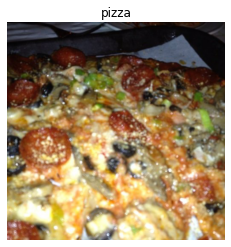

In [ ]:
view_random_image("pizza_steak/train", "pizza")

## An end-to-end example
#### Lets build a convolutionl neural network to find patterns in our images

**Load out images** <br>
**Preprocess our images** <br>
**Build a CNN to find patterns in our images** <br>
**Compile our CNN** <br>
**Fit the CNN to our training data** 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed 
tf.random.set_seed(42)

## Preprocessing data, normalization
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

## Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
## Build a CNN model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(train_data,
          epochs=5, 
          steps_per_epoch=len(train_data),
          validation_data=valid_data,
          validation_steps=len(valid_data))

Epoch 1/5
41/47 [=========================>....] - ETA: 0s - loss: 0.6048 - accuracy: 0.6631

In [ ]:
model.summary()

#### Binary classification: break down



In [ ]:
## 1. Become one with the data

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train", "pizza")


In [ ]:
### 2. Preprocess the data

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [ ]:
# Turn our data into batches
## Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
## Load our data 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

In [ ]:
## Get a sample of a train data batch
images, labels = train_data.next()
## How many batches
len(train_data)

In [ ]:
#Get the first two images
plt.imshow(images[0])
print(labels[0])

In [ ]:
plt.imshow(images[7])
print(labels[7])

In [ ]:
import tensorflow as tf


In [ ]:
## Create a model

model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid") 
])

model4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])


In [ ]:
## Fit the model
history4 = model4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

In [ ]:
from IPython.core.magics import history
## Evaluating our model
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [ ]:
##Plot the validation and training curves seperately
def plot_loss_curves(his):
  loss = his.history["loss"]
  val_loss = his.history["val_loss"]


  accuracy = his.history["accuracy"]
  val_accuracy = his.history["val_accuracy"]

  epochs = range(len(his.history["loss"]))

  ## Plot loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()


  ## Plot accuracy
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()

In [ ]:
plot_loss_curves(history4)

### Fitting the model parameters
#### Ways to induce overfitting:
- Increase the number of conv layers
- Increase the number of conv filters
- Add another dense layer to the output of our flattened layer


In [ ]:
#  Model
tf.random.set_seed(42)
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(20,3,activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
## Compile model
model5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

## Fit the model
history5 = model5.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history5)

In [ ]:
model5.summary()

In [ ]:
## Data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 0.3,
                                             zoom_range=0.1,
                                             horizontal_flip=True)

## Create ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_aug = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32,
                                            shuffle=True)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32,
                                            shuffle=False)


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

In [ ]:
images, labels = train_data_aug.next()

In [ ]:
plt.imshow(images[23])

In [ ]:
#  Model
tf.random.set_seed(42)
model_aug = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,5,activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

## Compile model
model_aug.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

## Fit the model
history_aug = model_aug.fit(train_data_aug,
                      epochs=10,
                      steps_per_epoch=len(train_data_aug),
                      validation_data=test_data,
                      validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_aug)

### Multi-class image classification

1. Become one with the data
2. Preprocess the data
3. Create a model (base)
4. Fit the model (overfit it)
5. Evaluate the model
6. Adjust different hyperparametrs
7. Repeat until satisfied

In [ ]:
## 1. Become one with the data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
## Setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
## Preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

## Load our data 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode="categorical",
                                            batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="categorical",
                                            batch_size=32)

In [ ]:
## Create a model

model_multi = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax") 
])

model_multi.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

In [ ]:
## Fit the model
history4 = model_multi.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history4)

In [ ]:
## Remove layers to decrease overfitting

model_multi_simple = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_multi_simple.compile(loss="categorical_crossentropy",
                          optimizer=tf.keras.optimizers.Adam(lr=0.001),
                           metrics=["accuracy"])

In [ ]:
## Fit the model
history_multi_simple = model_multi_simple.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

In [ ]:
model_multi_simple.summary()

In [ ]:
plot_loss_curves(history_multi_simple)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 0.3,
                                             zoom_range=0.1,
                                             horizontal_flip=True)

In [ ]:
train_data_aug = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode="categorical",
                                            batch_size=32,
                                            shuffle=True)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="categorical",
                                            batch_size=32)

In [ ]:
model_multi_aug = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_multi_aug.compile(loss="categorical_crossentropy",
                          optimizer=tf.keras.optimizers.Adam(lr=0.001),
                           metrics=["accuracy"])

In [ ]:
## Fit the model
history_multi_aug = model_multi_aug.fit(train_data_aug,
                      epochs=5,
                      steps_per_epoch=int( 0.7* len(train_data_aug)),
                      validation_data=test_data,
                      validation_steps=int(0.5 *len(test_data)))

In [ ]:
plot_loss_curves(history_multi_aug)

In [ ]:
model_multi_aug.summary()